In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


In [2]:
db = pd.read_csv("teams.csv")
db

,team,country,year,events,athletes,age,height,weight,medals,prev_medals,prev_3_medals
0,AFG,Afghanistan,1964,8,8,22.0,161.0,64.2,0,0.0,0.0
1,AFG,Afghanistan,1968,5,5,23.2,170.2,70.0,0,0.0,0.0
2,AFG,Afghanistan,1972,8,8,29.0,168.3,63.8,0,0.0,0.0
3,AFG,Afghanistan,1980,11,11,23.6,168.4,63.2,0,0.0,0.0
4,AFG,Afghanistan,2004,5,5,18.6,170.8,64.8,0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
2139,ZIM,Zimbabwe,2000,19,26,25.0,179.0,71.1,0,0.0,0.0
2140,ZIM,Zimbabwe,2004,11,14,25.1,177.8,70.5,3,0.0,0.0
2141,ZIM,Zimbabwe,2008,15,16,26.1,171.9,63.7,4,3.0,1.0
2142,ZIM,Zimbabwe,2012,8,9,27.3,174.4,65.2,0,4.0,2.3


In [3]:
db.describe()

,year,events,athletes,age,height,weight,medals,prev_medals,prev_3_medals
count,2144.000000,2144.000000,2144.000000,2144.000000,2144.000000,2144.000000,2144.000000,2014.000000,2014.000000
mean,1994.507463,35.724813,73.693097,24.778591,173.900233,69.271595,10.556437,10.248759,9.449901
std,15.384205,49.490270,127.907577,2.808559,5.357367,7.606507,33.028143,31.951920,28.232227
min,1964.000000,1.000000,1.000000,17.000000,151.000000,43.000000,0.000000,0.000000,0.000000
25%,1984.000000,6.000000,7.000000,23.275000,170.500000,64.500000,0.000000,0.000000,0.000000
50%,1996.000000,13.000000,19.000000,24.700000,174.400000,69.400000,0.000000,0.000000,0.300000
75%,2008.000000,44.000000,70.250000,26.100000,177.300000,73.400000,4.000000,4.000000,4.650000
max,2016.000000,270.000000,839.000000,66.000000,193.000000,148.000000,442.000000,442.000000,314.000000


In [4]:
db.columns

Index(['team', 'country', 'year', 'events', 'athletes', 'age', 'height',
       'weight', 'medals', 'prev_medals', 'prev_3_medals'],
      dtype='object')

In [5]:
db2 = db[['team', 'country', 'year', 'events', 'athletes', 'age', 'prev_medals', 'medals']]
db2

,team,country,year,events,athletes,age,prev_medals,medals
0,AFG,Afghanistan,1964,8,8,22.0,0.0,0
1,AFG,Afghanistan,1968,5,5,23.2,0.0,0
2,AFG,Afghanistan,1972,8,8,29.0,0.0,0
3,AFG,Afghanistan,1980,11,11,23.6,0.0,0
4,AFG,Afghanistan,2004,5,5,18.6,0.0,0
...,...,...,...,...,...,...,...,...
2139,ZIM,Zimbabwe,2000,19,26,25.0,0.0,0
2140,ZIM,Zimbabwe,2004,11,14,25.1,0.0,3
2141,ZIM,Zimbabwe,2008,15,16,26.1,3.0,4
2142,ZIM,Zimbabwe,2012,8,9,27.3,4.0,0


In [6]:
db2.corr(numeric_only= True)['medals']

year          -0.021603
events         0.771330
athletes       0.840817
age            0.025096
prev_medals    0.920048
medals         1.000000
Name: medals, dtype: float64

In [7]:
import seaborn as sns

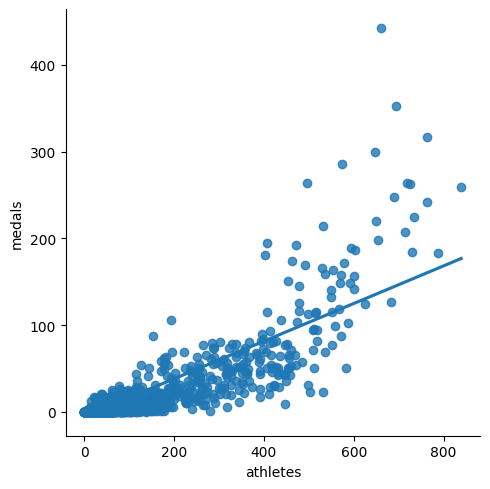

In [8]:
sns.lmplot(x= 'athletes', y= 'medals', data= db2, fit_reg= True, ci= None )

<Axes: ylabel='Frequency'>

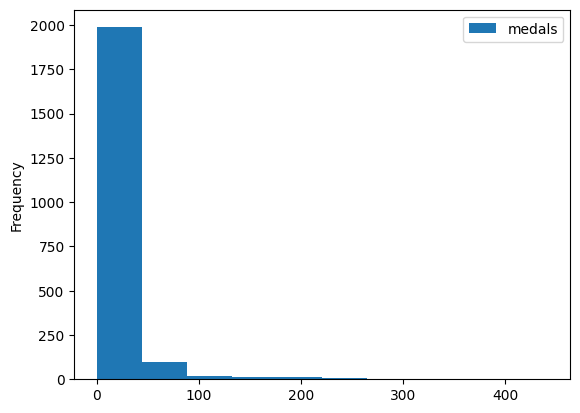

In [9]:
db2.plot.hist(y= 'medals')

In [10]:
db2[db2.isnull().any(axis= 1)]

,team,country,year,events,athletes,age,prev_medals,medals
19,ALB,Albania,1992,8,9,25.3,NaN,0
26,ALG,Algeria,1964,7,7,26.0,NaN,0
39,AND,Andorra,1976,2,3,28.3,NaN,0
50,ANG,Angola,1980,14,17,17.4,NaN,0
59,ANT,Antigua and Barbuda,1976,11,17,23.2,NaN,0
...,...,...,...,...,...,...,...,...
2092,VIN,Saint Vincent and the Grenadines,1988,6,6,20.5,NaN,0
2103,YAR,North Yemen,1984,3,3,27.7,NaN,0
2105,YEM,Yemen,1992,8,8,19.6,NaN,0
2112,YMD,South Yemen,1988,5,5,23.6,NaN,0


In [11]:
db3 = db2.dropna()

In [12]:
db3

,team,country,year,events,athletes,age,prev_medals,medals
0,AFG,Afghanistan,1964,8,8,22.0,0.0,0
1,AFG,Afghanistan,1968,5,5,23.2,0.0,0
2,AFG,Afghanistan,1972,8,8,29.0,0.0,0
3,AFG,Afghanistan,1980,11,11,23.6,0.0,0
4,AFG,Afghanistan,2004,5,5,18.6,0.0,0
...,...,...,...,...,...,...,...,...
2139,ZIM,Zimbabwe,2000,19,26,25.0,0.0,0
2140,ZIM,Zimbabwe,2004,11,14,25.1,0.0,3
2141,ZIM,Zimbabwe,2008,15,16,26.1,3.0,4
2142,ZIM,Zimbabwe,2012,8,9,27.3,4.0,0


In [13]:
train =  db3[db3['year'] < 2012].copy()

In [14]:
test = db3[db3['year'] >= 2012].copy()

In [15]:
train.shape

(1609, 8)

In [16]:
test.shape

(405, 8)

In [17]:
from sklearn.linear_model import LinearRegression

In [18]:
reg= LinearRegression()

In [19]:
predictors= ['events', 'athletes', 'prev_medals']
target= 'medals'

In [20]:
reg.fit(train[predictors], train['medals'])

LinearRegression()

In [21]:
predictions = reg.predict(test[predictors])

In [22]:
predictions

array([ 4.14631164e-01,  9.06609940e-01, -5.27318313e-01, -2.67293075e-01,
       -3.55746506e-01, -4.42279726e-01, -2.67293075e-01,  6.06927759e-02,
        4.87557366e+00,  2.78799182e+00,  6.06927759e-02,  8.24514001e-01,
        4.36914577e+01,  3.58107287e+01,  1.20375686e-01, -2.02142934e+00,
        6.06927759e-02, -3.53395373e-02,  6.06927759e-02,  6.06927759e-02,
        1.39190630e+02,  1.21794346e+02, -3.68205037e+00, -3.72001907e+00,
       -3.39355552e+00, -1.00797975e+00,  5.88164333e+00,  4.33966660e+00,
       -4.31286000e-01, -4.31286000e-01,  1.96614000e-01, -6.23350627e-01,
       -2.67293075e-01, -5.27318313e-01,  8.95148913e+00,  5.47198712e+00,
       -1.03300149e-01, -2.67293075e-01, -1.99332463e-01, -5.95278926e-01,
        3.88678627e-01,  3.88678627e-01, -5.95278926e-01,  1.00581687e-01,
        2.24685701e-01,  2.24685701e-01,  1.98497609e+01,  1.52869285e+01,
       -1.03300149e-01, -4.59357701e-01,  6.06927759e-02,  1.87431300e+00,
        7.02439257e+01,  

In [23]:
test['predictions']= predictions 

In [24]:
test

,team,country,year,events,athletes,age,prev_medals,medals,predictions
6,AFG,Afghanistan,2012,6,6,24.8,1.0,1,0.414631
7,AFG,Afghanistan,2016,3,3,24.7,1.0,0,0.906610
24,ALB,Albania,2012,9,10,25.7,0.0,0,-0.527318
25,ALB,Albania,2016,6,6,23.7,0.0,0,-0.267293
37,ALG,Algeria,2012,29,39,24.8,2.0,1,-0.355747
...,...,...,...,...,...,...,...,...,...
2111,YEM,Yemen,2016,3,3,19.3,0.0,0,0.224686
2131,ZAM,Zambia,2012,7,7,22.6,0.0,0,-0.431286
2132,ZAM,Zambia,2016,7,7,24.1,0.0,0,-0.431286
2142,ZIM,Zimbabwe,2012,8,9,27.3,4.0,0,2.364372


In [25]:
test.loc[test['predictions'] < 0, 'predictions']= 0

In [26]:
test['predictions'] = test['predictions'].round()

In [27]:
test

,team,country,year,events,athletes,age,prev_medals,medals,predictions
6,AFG,Afghanistan,2012,6,6,24.8,1.0,1,0.0
7,AFG,Afghanistan,2016,3,3,24.7,1.0,0,1.0
24,ALB,Albania,2012,9,10,25.7,0.0,0,0.0
25,ALB,Albania,2016,6,6,23.7,0.0,0,0.0
37,ALG,Algeria,2012,29,39,24.8,2.0,1,0.0
...,...,...,...,...,...,...,...,...,...
2111,YEM,Yemen,2016,3,3,19.3,0.0,0,0.0
2131,ZAM,Zambia,2012,7,7,22.6,0.0,0,0.0
2132,ZAM,Zambia,2016,7,7,24.1,0.0,0,0.0
2142,ZIM,Zimbabwe,2012,8,9,27.3,4.0,0,2.0


In [28]:
from sklearn.metrics import mean_absolute_error

In [29]:
error = mean_absolute_error(test['medals'], test['predictions'])
error

3.269135802469136

In [30]:
db3.describe()['medals']

count    2014.000000
mean       10.990070
std        33.627528
min         0.000000
25%         0.000000
50%         0.000000
75%         5.000000
max       442.000000
Name: medals, dtype: float64

In [31]:
db[db['team']== 'USA']

,team,country,year,events,athletes,age,height,weight,medals,prev_medals,prev_3_medals
2042,USA,United States,1964,159,492,23.5,177.2,71.8,169,125.0,127.3
2043,USA,United States,1968,167,529,23.5,177.2,72.1,166,169.0,139.0
2044,USA,United States,1972,185,578,23.6,177.6,71.7,171,166.0,153.3
2045,USA,United States,1976,189,554,23.0,177.3,71.0,164,171.0,168.7
2046,USA,United States,1984,217,693,24.6,177.2,71.6,352,164.0,167.0
2047,USA,United States,1988,230,715,25.2,177.1,71.4,207,352.0,229.0
2048,USA,United States,1992,248,734,25.7,177.0,71.9,224,207.0,241.0
2049,USA,United States,1996,263,839,26.4,177.5,73.2,259,224.0,261.0
2050,USA,United States,2000,265,764,26.6,177.3,73.6,242,259.0,230.0
2051,USA,United States,2004,254,726,26.5,177.0,73.6,263,242.0,241.7


In [32]:
db3[db3['team']== 'USA']

,team,country,year,events,athletes,age,prev_medals,medals
2042,USA,United States,1964,159,492,23.5,125.0,169
2043,USA,United States,1968,167,529,23.5,169.0,166
2044,USA,United States,1972,185,578,23.6,166.0,171
2045,USA,United States,1976,189,554,23.0,171.0,164
2046,USA,United States,1984,217,693,24.6,164.0,352
2047,USA,United States,1988,230,715,25.2,352.0,207
2048,USA,United States,1992,248,734,25.7,207.0,224
2049,USA,United States,1996,263,839,26.4,224.0,259
2050,USA,United States,2000,265,764,26.6,259.0,242
2051,USA,United States,2004,254,726,26.5,242.0,263


In [33]:
test[test['team']== 'USA']

,team,country,year,events,athletes,age,prev_medals,medals,predictions
2053,USA,United States,2012,245,689,26.7,317.0,248,280.0
2054,USA,United States,2016,245,719,26.4,248.0,264,240.0


In [34]:
test[test['country']== 'Singapore']

,team,country,year,events,athletes,age,prev_medals,medals,predictions
1721,SGP,Singapore,2012,29,36,23.4,3.0,4,0.0
1722,SGP,Singapore,2016,24,32,24.4,4.0,1,1.0


In [35]:
errors = (test['medals'] - test['predictions']).abs()
errors

6       1.0
7       1.0
24      0.0
25      0.0
37      1.0
       ... 
2111    0.0
2131    0.0
2132    0.0
2142    2.0
2143    3.0
Length: 405, dtype: float64

In [36]:
error_by_team = errors.groupby(test['team']).mean()
error_by_team

team
AFG    1.0
ALB    0.0
ALG    1.5
AND    0.0
ANG    4.0
      ... 
VIE    1.0
VIN    0.0
YEM    0.0
ZAM    0.0
ZIM    2.5
Length: 204, dtype: float64

In [37]:
medals_by_team = test['medals'].groupby(test['team']).mean()
medals_by_team

team
AFG    0.5
ALB    0.0
ALG    1.5
AND    0.0
ANG    0.0
      ... 
VIE    1.0
VIN    0.0
YEM    0.0
ZAM    0.0
ZIM    0.0
Name: medals, Length: 204, dtype: float64

In [ ]:
error_ratio = error_by_team / medals_by_team    #check relatively how large is the error for each country
error_ratio

team
AFG    2.0
ALB    NaN
ALG    1.0
AND    NaN
ANG    inf
      ... 
VIE    1.0
VIN    NaN
YEM    NaN
ZAM    NaN
ZIM    inf
Length: 204, dtype: float64

In [39]:
error_ratio[~pd.isnull(error_ratio)]

team
AFG    2.000000
ALG    1.000000
ANG         inf
ANT         inf
ARG    0.951220
         ...   
USA    0.109375
UZB    1.000000
VEN    1.000000
VIE    1.000000
ZIM         inf
Length: 112, dtype: float64

In [40]:
error_ratio = error_ratio[np.isfinite(error_ratio)]
error_ratio

team
AFG    2.000000
ALG    1.000000
ARG    0.951220
ARM    1.000000
AUS    0.331633
         ...   
UKR    0.317073
USA    0.109375
UZB    1.000000
VEN    1.000000
VIE    1.000000
Length: 97, dtype: float64

<Axes: ylabel='Frequency'>

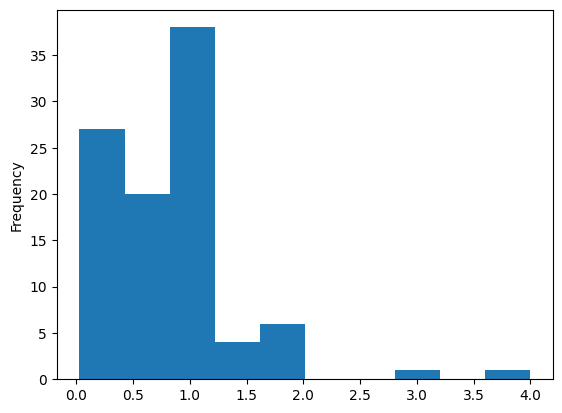

In [41]:
error_ratio.plot.hist()

In [ ]:
error_ratio.sort_values()

team
FRA    0.028090
RUS    0.050980
ETH    0.066667
NZL    0.095238
HUN    0.104167
         ...   
AFG    2.000000
GAB    2.000000
UGA    2.000000
BOT    3.000000
UAE    4.000000
Length: 97, dtype: float64

In [54]:
average_error_ratio = error_ratio.mean()
average_error_ratio

np.float64(0.8160980919790859)

In [55]:
median_error_ratio = error_ratio.median()
median_error_ratio

np.float64(0.8333333333333334)

In [53]:
accurate_teams = error_ratio[error_ratio < 0.5]
accurate_teams

team
AUS    0.331633
BAH    0.400000
BLR    0.171429
BRA    0.449541
CAN    0.201613
CHN    0.155462
CRO    0.474576
DEN    0.491228
DOM    0.333333
ESP    0.333333
ETH    0.066667
FIJ    0.461538
FRA    0.028090
GBR    0.132841
GER    0.252964
HUN    0.104167
ITA    0.121429
JAM    0.309091
JPN    0.317568
KEN    0.208333
KOR    0.471264
NED    0.362069
NOR    0.361111
NZL    0.095238
POL    0.214286
PRK    0.384615
ROU    0.218750
RSA    0.250000
RUS    0.050980
SWE    0.200000
UKR    0.317073
USA    0.109375
dtype: float64

In [49]:
count_less_than_1 = (error_ratio < 0.5).sum()
print(f"Number of teams with error ratio less than 1: {count_less_than_1}")

Number of teams with error ratio less than 1: 32
